<a href="https://colab.research.google.com/github/diogenesjusto/FIAP/blob/master/SHIFT/202305/t37_Aula_5_TL_Overfit_AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
# 0. Carga bibliotecas
import pandas as pd
import numpy as np
import sklearn.preprocessing as skpp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error # MSE
from sklearn import tree

In [3]:
# 1. Carga de dados
df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/mtcars.csv")

In [4]:
# 2. Análise exploratória
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
df.shape

(32, 12)

<Axes: xlabel='wt_log', ylabel='mpg'>

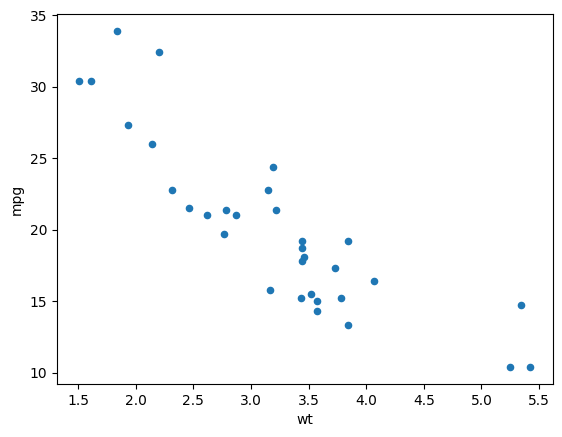

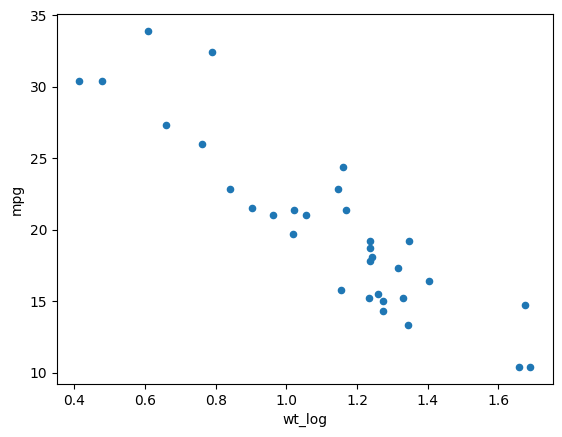

In [65]:
# Gráfico de dispersão
df.plot.scatter(x='wt', y='mpg')

# Transf. Polinomial
poly = skpp.PolynomialFeatures(14) # Parâmetro que define a ordem ou grau do polinômio

# Transf. de variáveis: LogLinear
df['wt_log'] = np.log(df['wt'])
df.plot.scatter(x='wt_log', y='mpg')

In [25]:
df.corr()

<ipython-input-25-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,wt_log
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925,-0.900081
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988,0.801618
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977,0.863715
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812,0.663691
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790,-0.731244
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606,0.978822
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249,-0.180540
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607,-0.564760
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534,-0.721678
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073,-0.584099


In [66]:
# 3. Separação de treino e teste
#x_treino, x_teste, y_treino, y_teste = train_test_split( df[['wt']], df['mpg'], test_size=0.25, random_state=1 )
x_treino, x_teste, y_treino, y_teste = train_test_split( df[['wt_log']], df['mpg'], test_size=0.25, random_state=1  )
x_treino, x_teste = poly.fit_transform(x_treino), poly.fit_transform(x_teste)

In [67]:
# 4. Modelo de Regressão Linear
mod = LinearRegression()
mod.fit(x_treino, y_treino)
print(mod.score(x_treino, y_treino)) # R2

0.9829152413000232


In [68]:
# 5. Erro de Previsão
y_prev = mod.predict(x_teste)
print(mean_squared_error(y_teste, y_prev))

939983366.9971007


## TEORIA DAS PROBABILIDADES 

In [71]:
dfTit = pd.read_csv('https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/dados_arvore_titanic.csv')
dfTit.shape

(891, 12)

In [87]:
# Tratamento de dados/tranformações

# Construção de dummy de gênero
dummies_sex =pd.get_dummies(dfTit['Sex'])
dfTit['SexFemale'] = dummies_sex['female']

In [74]:
# Matriz de contingência
pd.crosstab(dfTit['Survived'], dfTit['Sex'], margins=True)

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


In [75]:
# Probabilidade de sobrevivência
342/891

0.3838383838383838

In [76]:
# Probabilidade de um passageiro ser uma mulher
314/891

0.35241301907968575

In [77]:
233/314

0.7420382165605095

In [88]:
x_treino, x_teste, y_treino, y_teste = train_test_split( dfTit[['SexFemale']], dfTit['Survived'], test_size=0.25, random_state=1  )

In [89]:
# 4 Modelo de árvores
mod = tree.DecisionTreeClassifier()

mod.fit(x_treino, y_treino)

DecisionTreeClassifier()

In [91]:
# 5 Previsão em teste
# 5. Erro de Previsão
y_prev = mod.predict(x_teste)
y_prev

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0])